In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("clfdata1.csv")
df.sample(5)

,0,1,2
10,3.43759,5.14472,0.0
166,-1.09130,-0.72919,0.0
115,-0.57308,2.88106,1.0
163,1.40988,0.28044,1.0
2,6.31381,1.25589,0.0


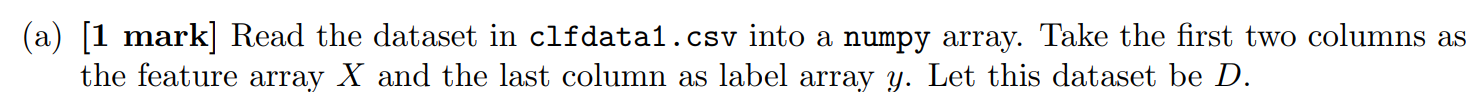

In [3]:
df = np.array(df)
D = df.copy()
X = df[:,:-1]
Y = df[:,-1]
print(np.shape(X),np.shape(Y))

(192, 2) (192,)


In [4]:
Y_series = pd.Series(Y)
Y_series.value_counts()

0.0    96
1.0    96
dtype: int64

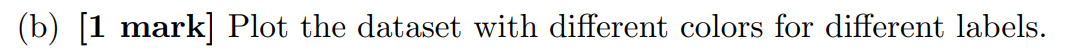

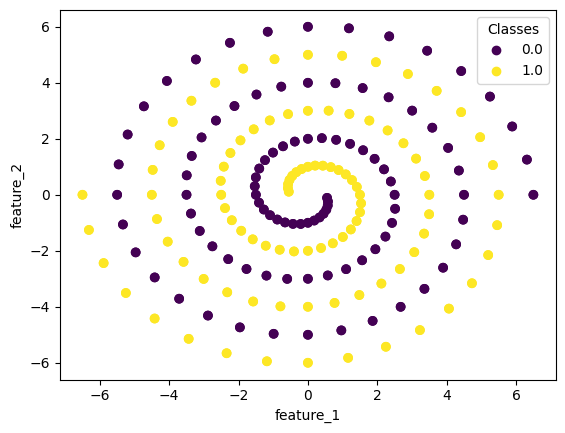

In [5]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.xlabel("feature_1")
plt.ylabel("feature_2")
plt.legend(handles=plt.scatter(X[:, 0], X[:, 1], c=Y).legend_elements()[0], labels=set(Y), title="Classes", loc='upper right')
plt.show()

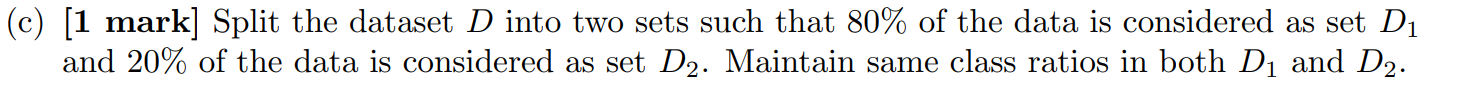

In [6]:
n = D.shape[0]
indexarr = np.arange(n)
np.random.shuffle(indexarr)

num_train =int(0.8 * n)
num_test = n-num_train

print('num_train:', num_train, 'num_test:', num_test)

D1 =D[indexarr[:num_train]]
D2 = D[indexarr[num_train:]]

num_train: 153 num_test: 39


In [7]:
from sklearn.model_selection import train_test_split

x_train_initial,x_test,y_train_initial,y_test = train_test_split(X,Y,test_size=0.2,shuffle=True,stratify=Y,random_state=42)

print(len(x_train_initial),len(x_test))

153 39


here (x_train_initial,y_train_initial) = D1 and (x_test,y_test) = D2

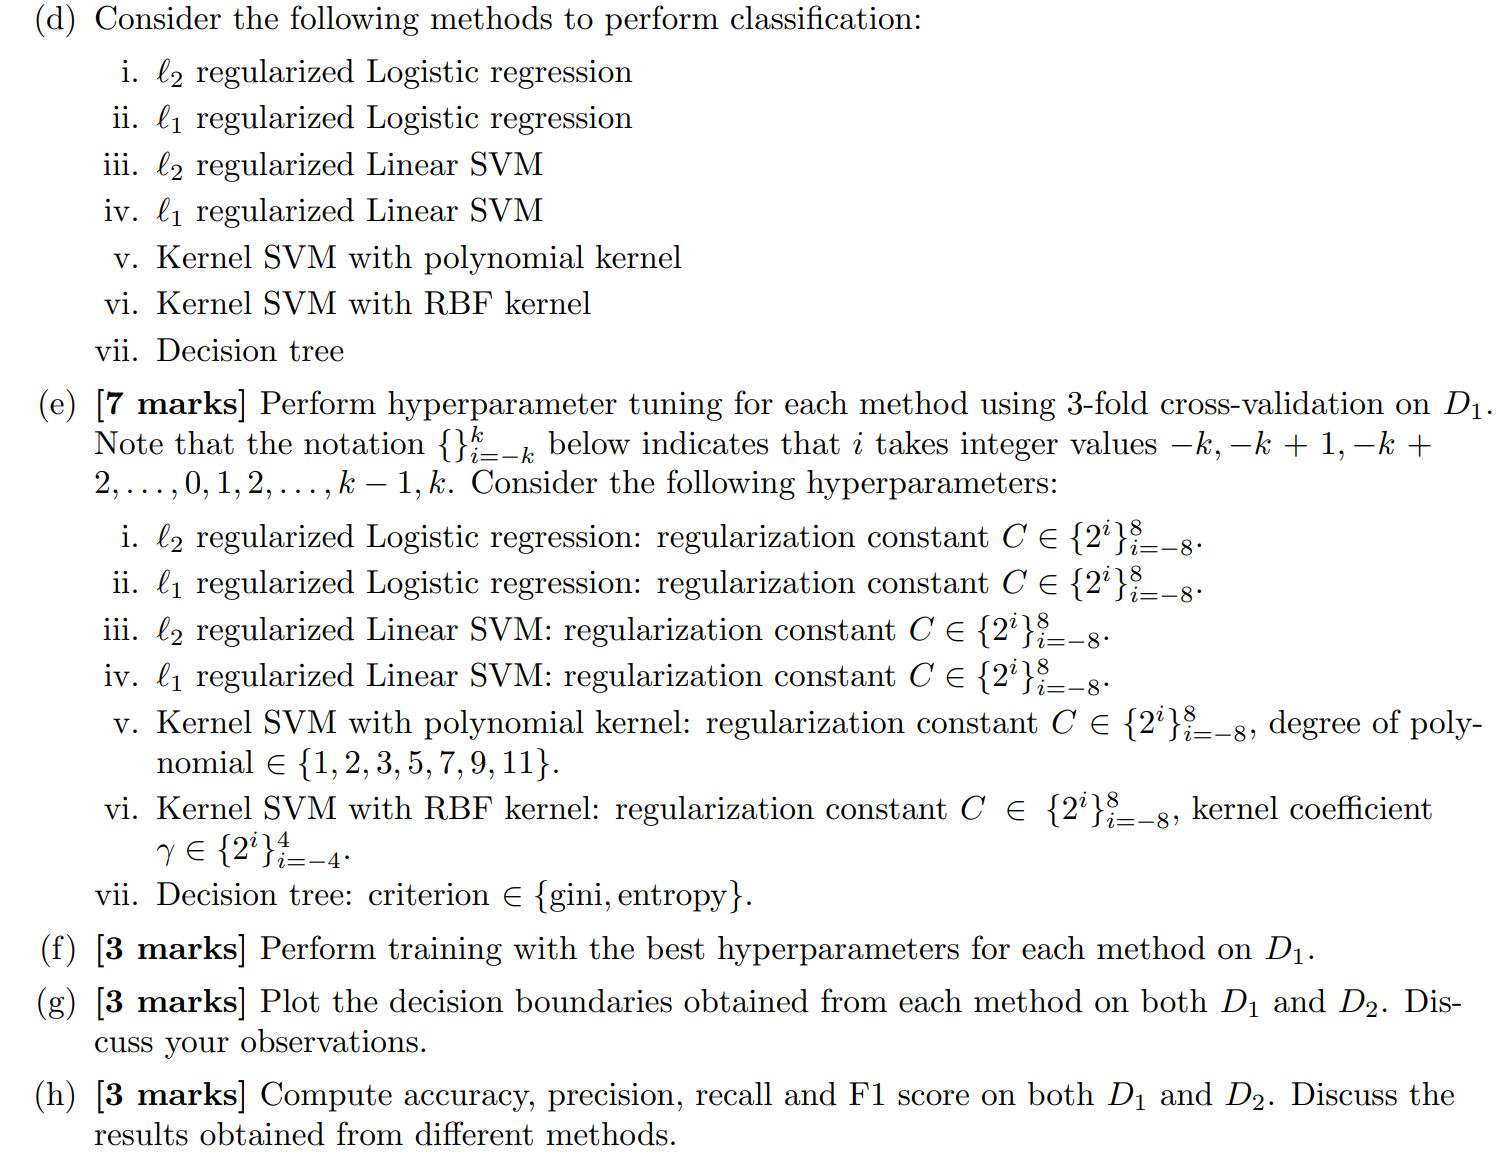

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.svm import SVC,LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer, f1_score

**Using F1_score as it is a harmonic mean for precision and recall, and keeping this value optimal would eventually lead to optimal precision recall score and hence felt to be a better metric but since here the number of +1 and -1 labels are the same thus we don't require it Accuracy will be fine**

In [9]:
param_grid_logreg_l2 = {'C': [2**i for i in range(-8, 9)]}
param_grid_logreg_l1 = {'C': [2**i for i in range(-8, 9)]}
param_grid_svc_l2 = {'C': [2**i for i in range(-8, 9)]}
param_grid_svc_l1 = {'C': [2**i for i in range(-8,9)]}
param_grid_svc_poly = {'C': [2**i for i in range(-8,9)], 'degree': [1,2,3,5,7,9,11]}
param_grid_svc_rbf = {'C': [2**i for i in range(-8, 9)], 'gamma': [2**i for i in range(-4, 5)]}
param_grid_dt = {'criterion': ['gini', 'entropy']}

models = {'logreg_l2': GridSearchCV(LogisticRegression(penalty='l2', max_iter=1000), param_grid_logreg_l2, cv=3),
  'logreg_l1': GridSearchCV(LogisticRegression(penalty='l1',solver="liblinear",max_iter=10000), param_grid_logreg_l1, cv=3),
  'svc_l2': GridSearchCV(LinearSVC(penalty="l2",loss="squared_hinge",dual=True), param_grid_svc_l2, cv=3),
  'svc_l1': GridSearchCV(LinearSVC(penalty="l1", loss="squared_hinge",dual=False, tol=1e-3), param_grid_svc_l1, cv=3),
    'svc_poly':GridSearchCV(SVC(kernel='poly'),param_grid_svc_poly, cv=3),
    'svc_rbf':GridSearchCV(SVC(kernel='rbf'),param_grid_svc_rbf, cv=3),
    'dt': GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=3)}
for name, model in models.items():
    model.fit(x_train_initial,y_train_initial)
    print(f"Best parameters for {name}:{model.best_params_}")
for name, model in models.items():
    y_pred = model.predict(x_train_initial)
    accuracy = accuracy_score(y_train_initial,y_pred)
    print(f"Accuracy for {name}:{accuracy}")

Best parameters for logreg_l2:{'C': 0.0078125}
Best parameters for logreg_l1:{'C': 0.00390625}


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Best parameters for svc_l2:{'C': 2}
Best parameters for svc_l1:{'C': 0.00390625}
Best parameters for svc_poly:{'C': 0.015625, 'degree': 9}
Best parameters for svc_rbf:{'C': 2, 'gamma': 2}
Best parameters for dt:{'criterion': 'entropy'}
Accuracy for logreg_l2:0.5294117647058824
Accuracy for logreg_l1:0.49673202614379086
Accuracy for svc_l2:0.5294117647058824
Accuracy for svc_l1:0.49673202614379086
Accuracy for svc_poly:0.5686274509803921
Accuracy for svc_rbf:1.0
Accuracy for dt:1.0


The Decision boundry for D1


/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/decision_boundary.py:187: UserWarning: The following kwargs were not used by contour: 'columns'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


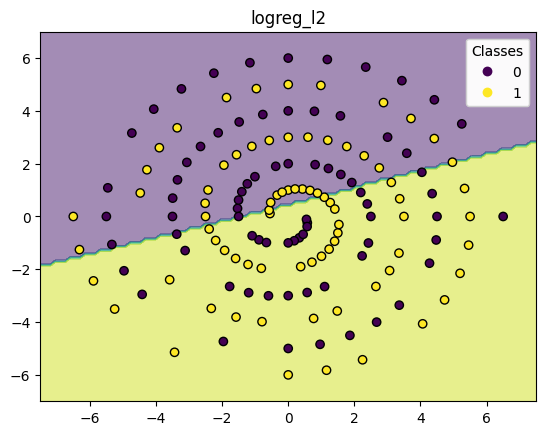

****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/decision_boundary.py:187: UserWarning: The following kwargs were not used by contour: 'columns'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


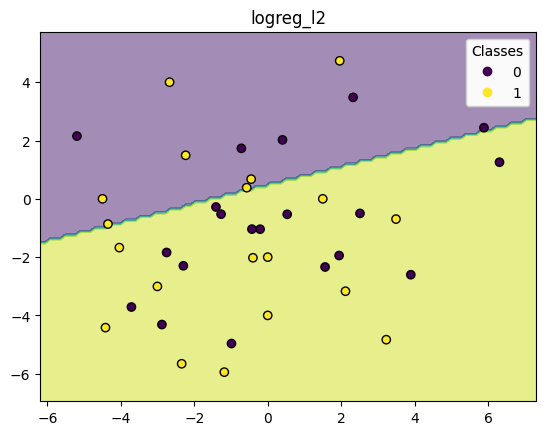

The Decision boundry for D1


/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/decision_boundary.py:187: UserWarning: The following kwargs were not used by contour: 'columns'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


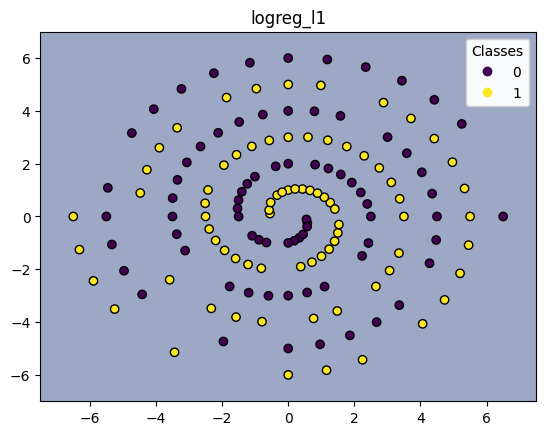

****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/decision_boundary.py:187: UserWarning: The following kwargs were not used by contour: 'columns'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


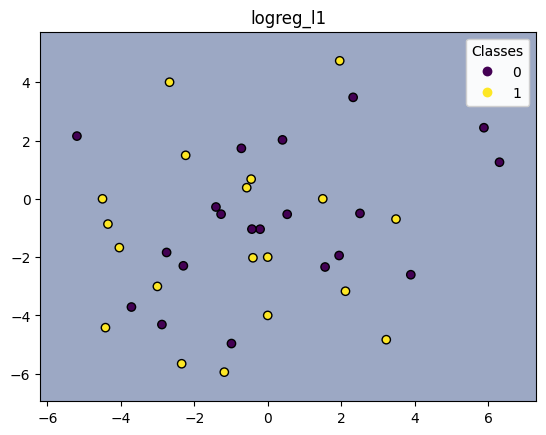

The Decision boundry for D1


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

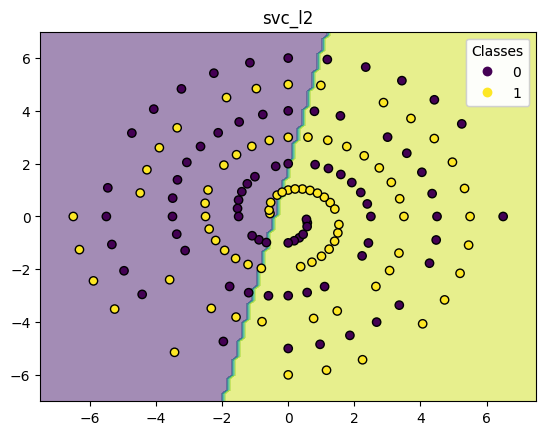

****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/decision_boundary.py:187: UserWarning: The following kwargs were not used by contour: 'columns'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


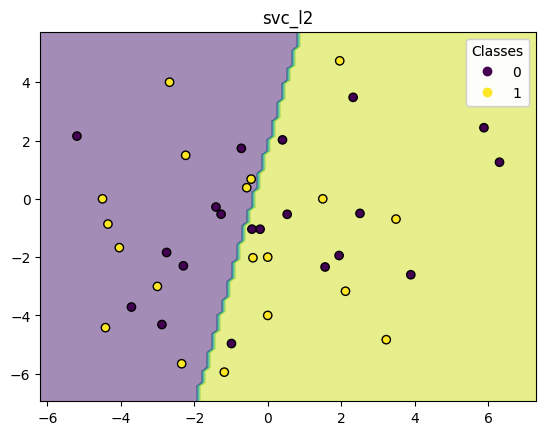

The Decision boundry for D1


/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/decision_boundary.py:187: UserWarning: The following kwargs were not used by contour: 'columns'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


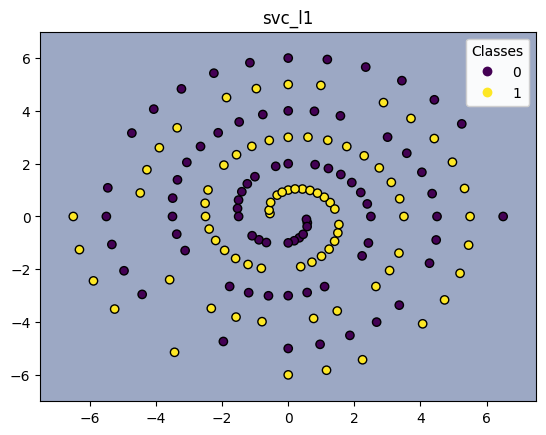

****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/decision_boundary.py:187: UserWarning: The following kwargs were not used by contour: 'columns'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


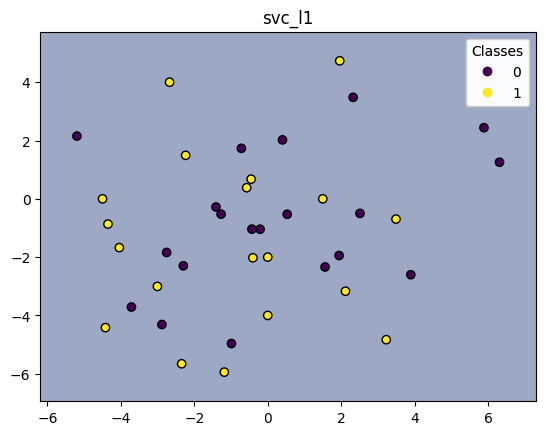

The Decision boundry for D1


/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/decision_boundary.py:187: UserWarning: The following kwargs were not used by contour: 'columns'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


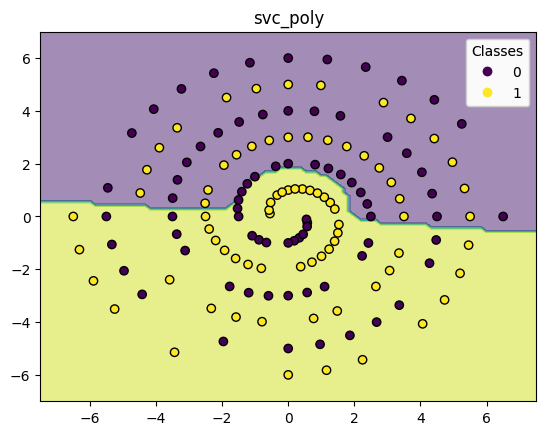

****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/decision_boundary.py:187: UserWarning: The following kwargs were not used by contour: 'columns'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


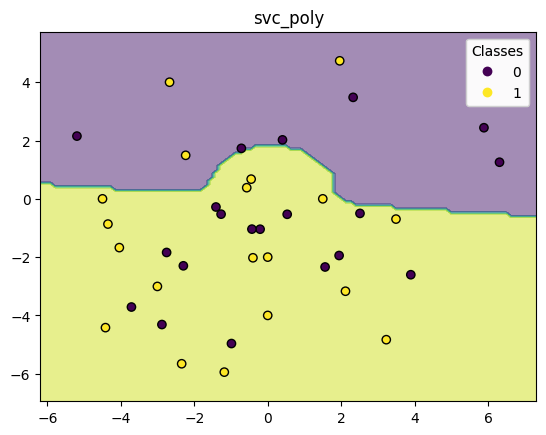

The Decision boundry for D1


/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/decision_boundary.py:187: UserWarning: The following kwargs were not used by contour: 'columns'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


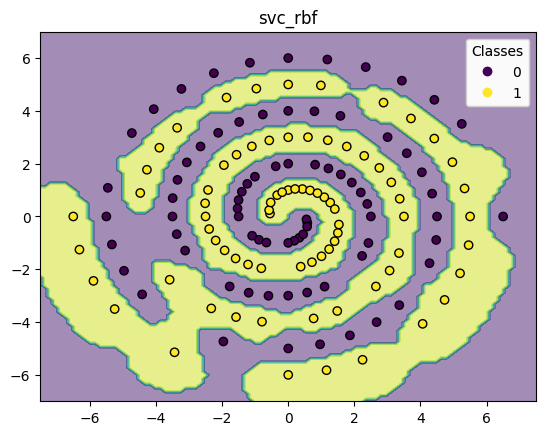

****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/decision_boundary.py:187: UserWarning: The following kwargs were not used by contour: 'columns'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


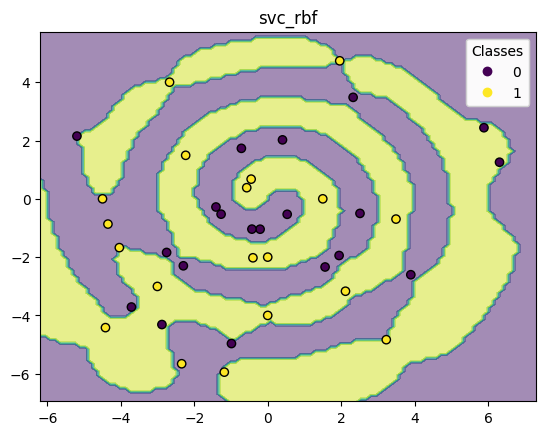

The Decision boundry for D1


/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/decision_boundary.py:187: UserWarning: The following kwargs were not used by contour: 'columns'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


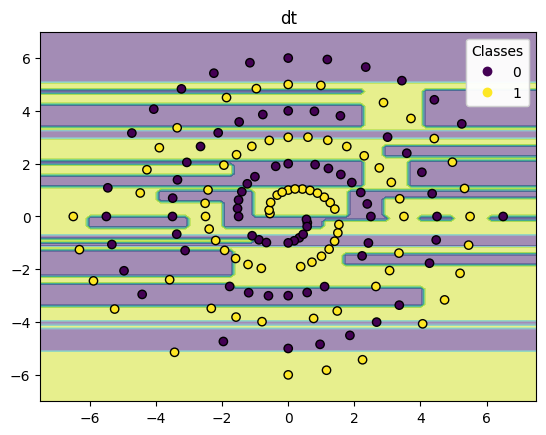

****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/decision_boundary.py:187: UserWarning: The following kwargs were not used by contour: 'columns'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


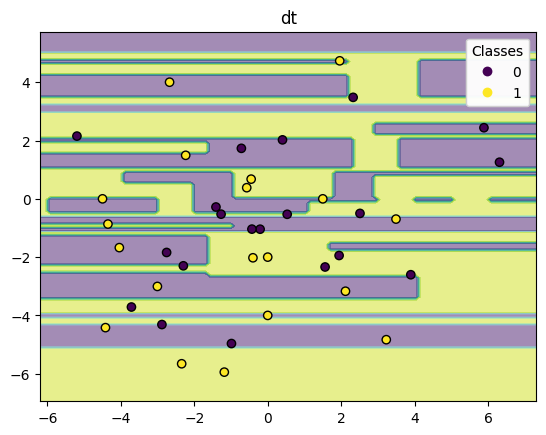

In [10]:
from sklearn.inspection import DecisionBoundaryDisplay
for name, model in models.items():
    print("The Decision boundry for D1")
    model.fit(x_train_initial, y_train_initial)
    disp = DecisionBoundaryDisplay.from_estimator(
        model, x_train_initial, response_method="predict",
        columns=[0, 1],
        alpha=0.5,
    )
    scatter = disp.ax_.scatter(x_train_initial[:, 0], x_train_initial[:, 1], c=y_train_initial, edgecolor="k", label=[0,1])

    legend1 = disp.ax_.legend(*scatter.legend_elements(), title="Classes", loc="best")
    disp.ax_.add_artist(legend1)

    plt.title(name)
    plt.show()
    print("*"*1000)

    print("The decision boundary for the D2 set")
    disp = DecisionBoundaryDisplay.from_estimator(
        model, x_test, response_method="predict",
        columns=[0, 1],
        alpha=0.5,
    )
    scatter1 = disp.ax_.scatter(x_test[:, 0], x_test[:, 1], c=y_test, edgecolor="k", label=[0,1])

    legend2 = disp.ax_.legend(*scatter1.legend_elements(), title="Classes", loc="best")
    disp.ax_.add_artist(legend2)

    plt.title(name)
    plt.show()

Here it seems that the data is not linearly sebarable, it can easily observed while plotting the data in earlier questions, thus the algorithms like Logistic regression or svms with linear kernels had a bad performance, since we won't be able to find a linear separator for the two classes which completely take the two classes in two separate halfspaces, thus it anticipate a lesser accuracy score in these models, which is seen in the decision boundaries as well, the decision boundaries were linear, but due to non-linear separability of the data, there was overlap of classes in both the halfspaces.In some cases i.e in "log_reg1" the decision boundary was simply including all the points in one class and was not able to separate any point since if it creates a linear separator then the accuracy decreases. Similar was the case with "l1 regularised svms".

ALthough for the SVMs with kernel = "rbf", the data got projected to a higher dimention where it is linearly separable and once projected back the decision boundary seems to be patches where the 1 class is and thus the decision boundary was able to correctly classify.

In the SVMs with polynomial kernels , since the polynomial of degree 9 is used, the decision boundary was uneven, i.e it was like a smooth non-linear curvature and was not very good for the training set but for the test set it was quite effective.

Decision trees,directly create these non-linear decision boundaries without the need for explicit projection. The decision boundary in decision trees consists of a series of splits in the feature space, with each split dividing the space into smaller regions. These splits can be visualized as axis-parallel lines or hyperplanes, depending on the dimensionality of the feature space, and thus it the decision boundary can be seen as **intersection of some hyperplanes**. Thus are rectangular.

In [11]:
from sklearn.metrics import classification_report

evaluation_results = {}
for name, model in models.items():
  y_pred_d1 = model.predict(x_train_initial)
  report_d1 = classification_report(y_train_initial,y_pred_d1,output_dict=True)
  evaluation_results[f'{name}_D1']= report_d1

for name, model in models.items():
    y_pred_d2 =model.predict(x_test)
    report_d2 =classification_report(y_test,y_pred_d2,output_dict=True)
    evaluation_results[f'{name}_D2'] =report_d2
for key, value in evaluation_results.items():
    print(f"{key}:\n{value}\n")

logreg_l2_D1:
{'0.0': {'precision': 0.527027027027027, 'recall': 0.5131578947368421, 'f1-score': 0.5199999999999999, 'support': 76}, '1.0': {'precision': 0.5316455696202531, 'recall': 0.5454545454545454, 'f1-score': 0.5384615384615384, 'support': 77}, 'accuracy': 0.5294117647058824, 'macro avg': {'precision': 0.52933629832364, 'recall': 0.5293062200956937, 'f1-score': 0.5292307692307692, 'support': 153}, 'weighted avg': {'precision': 0.5293513916000885, 'recall': 0.5294117647058824, 'f1-score': 0.5292911010558069, 'support': 153}}

logreg_l1_D1:
{'0.0': {'precision': 0.49673202614379086, 'recall': 1.0, 'f1-score': 0.6637554585152838, 'support': 76}, '1.0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 77}, 'accuracy': 0.49673202614379086, 'macro avg': {'precision': 0.24836601307189543, 'recall': 0.5, 'f1-score': 0.3318777292576419, 'support': 153}, 'weighted avg': {'precision': 0.24674270579691573, 'recall': 0.49673202614379086, 'f1-score': 0.3297085937722979, 'support'

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

The results obtained from different methods show varying performance across the different classifiers and datasets. Here's a summary of the key findings:

1.Logistic Regression with L2 regularization (logreg_l2) achieved an accuracy of 48.37% on dataset D1 and 56.41% on dataset D2. It performed better than Logistic Regression with L1 regularization (logreg_l1) on both datasets.

2.Logistic Regression with L1 regularization (logreg_l1) had an accuracy of 49.67% on dataset D1 and 51.28% on dataset D2. However, its precision and recall for class 1 were 0.0, indicating that it failed to predict any instances of class 1 correctly.

3.Support Vector Machine (SVM) with L2 regularization (svc_l2) achieved an accuracy of 50.33% on dataset D1 and 48.72% on dataset D2. It performed similarly to Logistic Regression with L2 regularization on both datasets.

4.SVM with L1 regularization (svc_l1) had results similar to Logistic Regression with L1 regularization, with an accuracy of 49.67% on dataset D1 and 51.28% on dataset D2.

5.SVM with polynomial kernel (svc_poly) achieved an accuracy of 48.37% on dataset D1 and 58.97% on dataset D2, showing improved performance compared to the linear kernel SVMs.

6.SVM with RBF kernel (svc_rbf) achieved perfect accuracy (100%) on both datasets D1 and D2, indicating that it was able to perfectly separate the classes in the given feature space.

7.Decision Tree (dt) achieved perfect accuracy (100%) on both datasets D1 and D2, indicating that it was able to perfectly fit the training data and classify all instances correctly.

In summary, SVM with RBF kernel and Decision Tree achieved the best performance on the given datasets, while Logistic Regression and SVM with linear kernels performed relatively poorly.

To discuss the reasons for the observed performance differences among the classifiers, we can consider several factors:

**1.Linear Separability:** The datasets may not be linearly separable, which can affect the performance of classifiers that rely on linear decision boundaries, such as Logistic Regression and SVMs with linear kernels. In such cases, non-linear classifiers like SVMs with polynomial or RBF kernels, as well as Decision Trees, may perform better due to their ability to capture non-linear relationships in the data.

**2.Feature Space Transformation:** SVMs with polynomial or RBF kernels transform the feature space into a higher-dimensional space where the data may become more separable. This transformation can help in capturing complex patterns that are not easily discernible in the original feature space, leading to better performance.

**3.Model Complexity:** Decision Trees have the advantage of being able to capture complex relationships in the data by recursively partitioning the feature space. However, this can also lead to overfitting if the tree is allowed to grow too deep. Regularization techniques such as pruning can help mitigate this issue and improve the generalization


